In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from collections import defaultdict

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/var/folders/b9/y7yy3gjx1vjcj8dmj6zw15kw0000gn/T/ipykernel_9569/2644844365.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


In [77]:
# Store filepath in a variable
df = pd.read_csv("Resources/all_data_pvm_acc3.csv", encoding="ISO-8859-1")
pauses = pd.read_csv("Resources/pauses.csv", encoding="ISO-8859-1")

In [5]:
df.Session_Type.unique()

array(['Baseline', 'Sham', 'Active'], dtype=object)

In [7]:
df.wab1_aq.max()

95.1

In [4]:
df.columns.to_list()

['PID',
 'Target',
 'Production',
 'Prod_Word_Dur',
 'Prod_Arpabet',
 'Prod_Phon_Dur',
 'NOTES',
 'Word_ID',
 'Session_ID',
 'Prod_Word_N',
 'Prod_Phon_N',
 'Code',
 'Phon_Sess_Code',
 'Word_Sess_Code',
 'Prod_Last_Phon',
 'Prod_Word_IPA',
 'Prod_Phon_IPA',
 'Prod_Phoneme_ID',
 'Prod_Prev_Phon',
 'Prod_Next_Phon',
 'Target_Arpabet',
 'Target_N_Tot_Words',
 'Target_Word_IPA',
 'Target_N_Tot_Syllables',
 'Target_N_Tot_Phonemes',
 'Target_Phon_Arpabet',
 'Target_Phoneme_ID',
 'Target_Syll_Env',
 'Target_Word_Pos',
 'Syllable_NumID',
 'Target_Word_NumID',
 'Target_Con_Cluster',
 'Target_Clust_ID',
 'Target_Clus_Type',
 'Target_Clust_Phon_Pos',
 'Target_Clust_Phon_Env',
 'Target_Phon_IPA',
 'Target_Prev_Phon',
 'Target_Next_Phon',
 'Prod_syllabic',
 'Prod_consonantal',
 'Prod_sonorant',
 'Prod_continuant',
 'Prod_delayed release',
 'Prod_approximant',
 'Prod_tap',
 'Prod_nasal',
 'Prod_voice',
 'Prod_spread gl',
 'Prod_constr gl',
 'Prod_labial',
 'Prod_round',
 'Prod_labiodental',
 'Prod_c

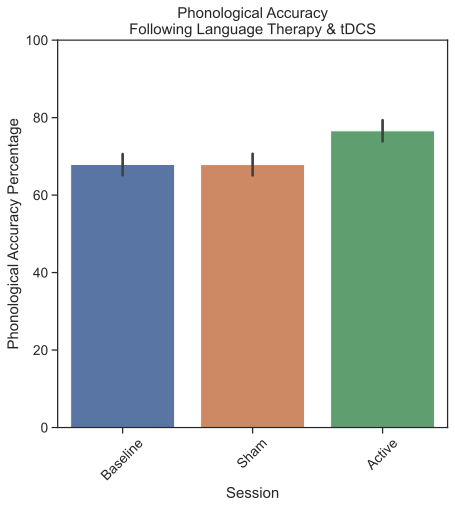

In [62]:
#Phon_Acc

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

g = (
    sns
    .barplot(
        x='Session_Type',
        y='Phon_Acc',
        hue='Session_Type',
        hue_order = ['Baseline', 'Sham', 'Active'],
        estimator = (lambda x: x.mean()*100),
        dodge=False,
        ax=ax,
        data=df)
    )
g.set(ylim=(0, 100))
g.legend([],[], frameon=False)
plt.title('Phonological Accuracy\nFollowing Language Therapy & tDCS')
plt.ylabel('Phonological Accuracy Percentage')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

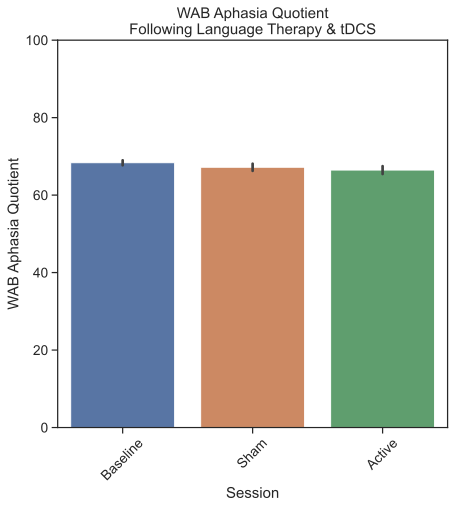

In [61]:
#Phon_Acc

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

g = (
    sns
    .barplot(
        x='Session_Type',
        y='wab1_aq',
        hue='Session_Type',
        hue_order = ['Baseline', 'Sham', 'Active'],
        dodge=False,
        ax=ax,
        data=df)
    )
g.set(ylim=(0, 100))
g.legend([],[], frameon=False)
plt.title('WAB Aphasia Quotient\nFollowing Language Therapy & tDCS')
plt.ylabel('WAB Aphasia Quotient')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

In [42]:
wabaq = df[df['Session_Type']=='Baseline'].groupby('PID')['wab1_aq'].mean().to_frame().reset_index()
wabaq

,PID,wab1_aq
0,1,64.7
1,5,78.0
2,8,91.8
3,9,41.7
4,12,73.0
5,13,68.3
6,15,67.8
7,16,82.0


In [44]:
# Create bins in which to place values based upon ADI_NATRANK
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create labels for these bins
group_labels = ['1-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100']

In [46]:
# Slice the data and place it into bins
wabaq['wabaq_start']=pd.cut(wabaq["wab1_aq"], bins, labels=group_labels)
wabaq=wabaq.drop(columns=['wab1_aq'])
wabaq


,PID,wabaq_start
0,1,61-70
1,5,71-80
2,8,91-100
3,9,41-50
4,12,71-80
5,13,61-70
6,15,61-70
7,16,81-90


In [51]:
df2 = df.merge(wabaq, on='PID', how='left')
df2['wabaq_start'] = df2['wabaq_start'].astype(str)
df2.head()

,PID,Target,Production,Prod_Word_Dur,Prod_Arpabet,Prod_Phon_Dur,NOTES,Word_ID,Session_ID,Prod_Word_N,...,Height_Acc,Frontness_Acc,Tenseness_Acc,Roundness_Acc,wab1_aq,wab1_nwf_total,Session_Type,Improvement_Group,NWF_Improvement_Group,wabaq_start
0,15,book,B UH K,0.295646,B,0.024363,Article (ÃÂ) before word,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,67.8,3.8,Baseline,No_Improved,NWF_No_Improved,61-70
1,15,book,B UH K,0.295646,UH,0.163408,Article (ÃÂ) before word,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,67.8,3.8,Baseline,No_Improved,NWF_No_Improved,61-70
2,15,book,B UH K,0.295646,K,0.107875,Article (ÃÂ) before word,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,67.8,3.8,Baseline,No_Improved,NWF_No_Improved,61-70
3,15,ball,B AO L,0.397365,B,0.014197,NaN,2.0,0.0,2.0,...,1.0,1.0,1.0,1.0,67.8,3.8,Baseline,No_Improved,NWF_No_Improved,61-70
4,15,ball,B AO L,0.397365,AO,0.211006,NaN,2.0,0.0,2.0,...,1.0,1.0,1.0,1.0,67.8,3.8,Baseline,No_Improved,NWF_No_Improved,61-70


In [87]:
df2.to_csv('Resources/all_data_pvm_acc4.csv')

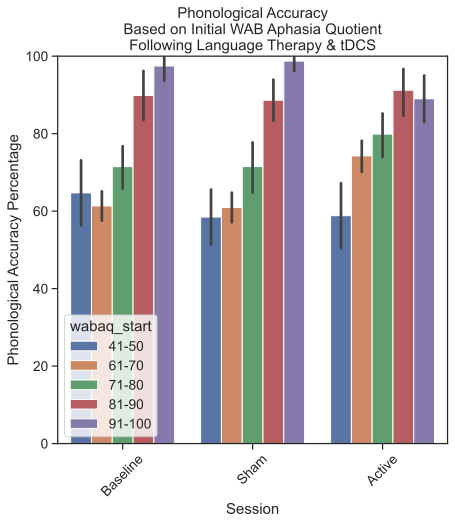

In [57]:
#Phon_Acc

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

hue_order = ['41-50','61-70','71-80','81-90','91-100']
order = ['Baseline', 'Sham', 'Active']

g = (
    sns
    .barplot(
        x='Session_Type',
        y='Phon_Acc',
        hue='wabaq_start',
        hue_order = hue_order,
        order = order,
        estimator = (lambda x: x.mean()*100),
        ax=ax,
        data=df2)
    )
g.set(ylim=(0, 100))
plt.title('Phonological Accuracy\nBased on Initial WAB Aphasia Quotient\nFollowing Language Therapy & tDCS')
plt.ylabel('Phonological Accuracy Percentage')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

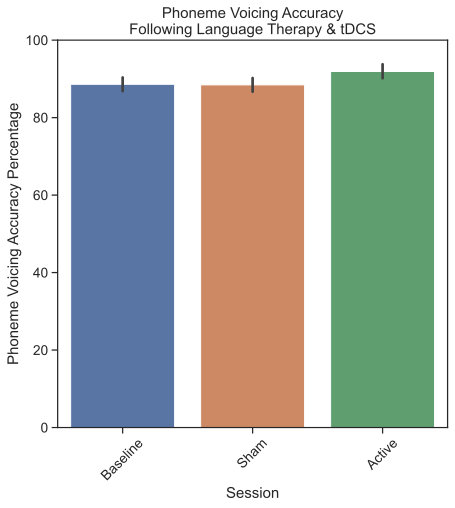

In [60]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

g = (
    sns
    .barplot(
        x='Session_Type',
        y='Voicing_Acc',
        hue='Session_Type',
        hue_order = ['Baseline', 'Sham', 'Active'],
        estimator = (lambda x: x.mean()*100),
        dodge=False,
        ax=ax,
        data=df)
    )
g.set(ylim=(0, 100))
g.legend([],[], frameon=False)
plt.title('Phoneme Voicing Accuracy\nFollowing Language Therapy & tDCS')
plt.ylabel('Phoneme Voicing Accuracy Percentage')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

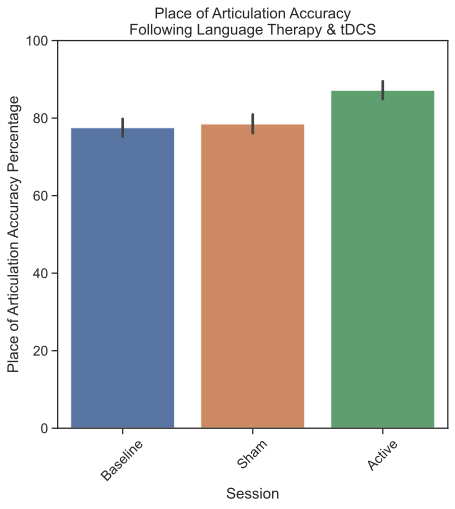

In [64]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

g = (
    sns
    .barplot(
        x='Session_Type',
        y='Place_Acc',
        hue='Session_Type',
        hue_order = ['Baseline', 'Sham', 'Active'],
        estimator = (lambda x: x.mean()*100),
        dodge=False,
        ax=ax,
        data=df)
    )
g.set(ylim=(0, 100))
g.legend([],[], frameon=False)
plt.title('Place of Articulation Accuracy\nFollowing Language Therapy & tDCS')
plt.ylabel('Place of Articulation Accuracy Percentage')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

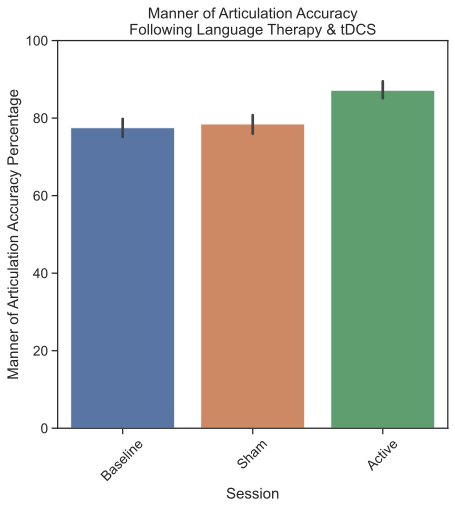

In [65]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

g = (
    sns
    .barplot(
        x='Session_Type',
        y='Place_Acc',
        hue='Session_Type',
        hue_order = ['Baseline', 'Sham', 'Active'],
        estimator = (lambda x: x.mean()*100),
        dodge=False,
        ax=ax,
        data=df)
    )
g.set(ylim=(0, 100))
g.legend([],[], frameon=False)
plt.title('Manner of Articulation Accuracy\nFollowing Language Therapy & tDCS')
plt.ylabel('Manner of Articulation Accuracy Percentage')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

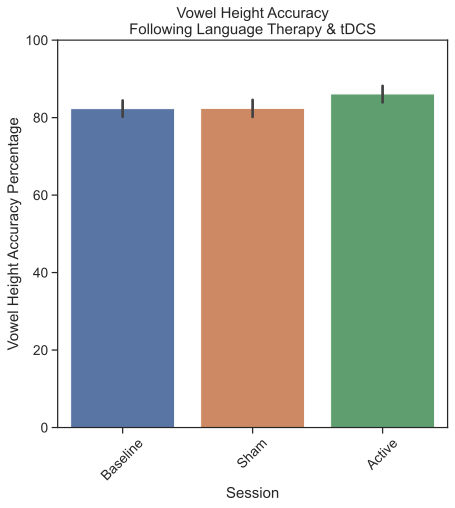

In [66]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

g = (
    sns
    .barplot(
        x='Session_Type',
        y='Height_Acc',
        hue='Session_Type',
        hue_order = ['Baseline', 'Sham', 'Active'],
        estimator = (lambda x: x.mean()*100),
        dodge=False,
        ax=ax,
        data=df)
    )
g.set(ylim=(0, 100))
g.legend([],[], frameon=False)
plt.title('Vowel Height Accuracy\nFollowing Language Therapy & tDCS')
plt.ylabel('Vowel Height Accuracy Percentage')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

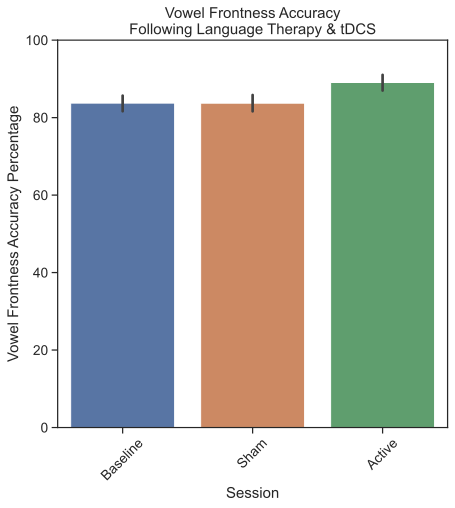

In [67]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

g = (
    sns
    .barplot(
        x='Session_Type',
        y='Frontness_Acc',
        hue='Session_Type',
        hue_order = ['Baseline', 'Sham', 'Active'],
        estimator = (lambda x: x.mean()*100),
        dodge=False,
        ax=ax,
        data=df)
    )
g.set(ylim=(0, 100))
g.legend([],[], frameon=False)
plt.title('Vowel Frontness Accuracy\nFollowing Language Therapy & tDCS')
plt.ylabel('Vowel Frontness Accuracy Percentage')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

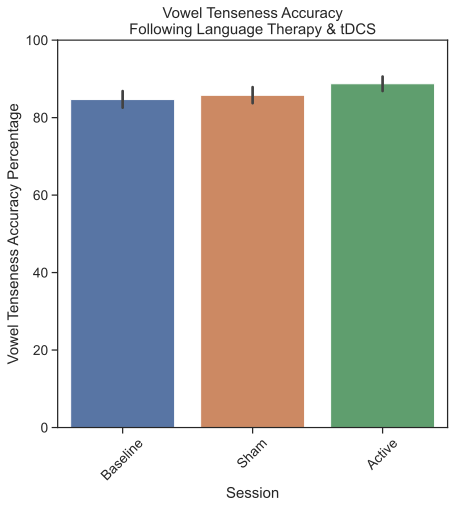

In [70]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

g = (
    sns
    .barplot(
        x='Session_Type',
        y='Tenseness_Acc',
        hue='Session_Type',
        hue_order = ['Baseline', 'Sham', 'Active'],
        estimator = (lambda x: x.mean()*100),
        dodge=False,
        ax=ax,
        data=df)
    )
g.set(ylim=(0, 100))
g.legend([],[], frameon=False)
plt.title('Vowel Tenseness Accuracy\nFollowing Language Therapy & tDCS')
plt.ylabel('Vowel Tenseness Accuracy Percentage')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

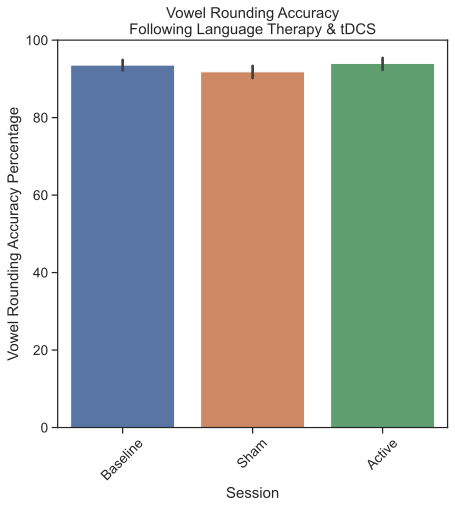

In [71]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

g = (
    sns
    .barplot(
        x='Session_Type',
        y='Roundness_Acc',
        hue='Session_Type',
        hue_order = ['Baseline', 'Sham', 'Active'],
        estimator = (lambda x: x.mean()*100),
        dodge=False,
        ax=ax,
        data=df)
    )
g.set(ylim=(0, 100))
g.legend([],[], frameon=False)
plt.title('Vowel Rounding Accuracy\nFollowing Language Therapy & tDCS')
plt.ylabel('Vowel Rounding Accuracy Percentage')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

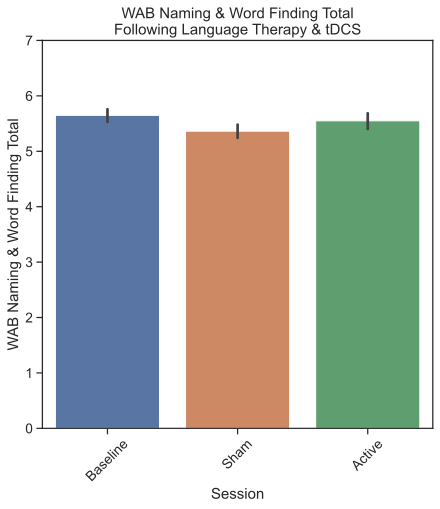

In [76]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))

g = (
    sns
    .barplot(
        x='Session_Type',
        y='wab1_nwf_total',
        hue='Session_Type',
        hue_order = ['Baseline', 'Sham', 'Active'],
        dodge=False,
        ax=ax,
        data=df)
    )
g.set(ylim=(0, 7))
g.legend([],[], frameon=False)
plt.title('WAB Naming & Word Finding Total\nFollowing Language Therapy & tDCS')
plt.ylabel('WAB Naming & Word Finding Total')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

In [84]:
pauses

,PID,Session_ID,speech_pause,start,end,dur,wab1_aq,wab1_nwf_total,wab1_ss_total,Session_Type,...,numspeech_total,mean_length,total_length,index,numpause_to_speech_prop,duration_speech,durspeechtotal,duration_nonspeech,durpausetotal,pause_rate
0,rPPA-05,2.0,speech,40.36,40.81,0.45,71.1,8.1,13.0,Active,...,29,0.929655,26.96,19,0.965517,0.45,26.96,0.00,44.77,0.624146
1,rPPA-05,2.0,speech,42.54,43.31,0.77,71.1,8.1,13.0,Active,...,29,0.929655,26.96,19,0.965517,0.77,26.96,0.00,44.77,0.624146
2,rPPA-05,2.0,speech,44.28,45.32,1.04,71.1,8.1,13.0,Active,...,29,0.929655,26.96,19,0.965517,1.04,26.96,0.00,44.77,0.624146
3,rPPA-05,2.0,speech,45.78,46.91,1.13,71.1,8.1,13.0,Active,...,29,0.929655,26.96,19,0.965517,1.13,26.96,0.00,44.77,0.624146
4,rPPA-05,2.0,speech,47.16,47.76,0.60,71.1,8.1,13.0,Active,...,29,0.929655,26.96,19,0.965517,0.60,26.96,0.00,44.77,0.624146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,rPPA-07,2.0,nonspeech,220.31,221.48,1.17,91.5,8.9,19.0,Active,...,101,1.388200,138.82,24,0.990099,0.00,75.77,1.17,138.82,0.646908
3752,rPPA-07,2.0,nonspeech,222.58,225.20,2.62,91.5,8.9,19.0,Active,...,101,1.388200,138.82,24,0.990099,0.00,75.77,2.62,138.82,0.646908
3753,rPPA-07,2.0,nonspeech,225.70,226.17,0.47,91.5,8.9,19.0,Active,...,101,1.388200,138.82,24,0.990099,0.00,75.77,0.47,138.82,0.646908
3754,rPPA-07,2.0,nonspeech,226.98,227.18,0.20,91.5,8.9,19.0,Active,...,101,1.388200,138.82,24,0.990099,0.00,75.77,0.20,138.82,0.646908


In [79]:
pauses.columns.to_list()

['PID',
 'Session_ID',
 'speech_pause',
 'start',
 'end',
 'dur',
 'wab1_aq',
 'wab1_nwf_total',
 'wab1_ss_total',
 'Session_Type',
 'Improvement_Group',
 'NWF_Improvement_Group',
 'SS_Improvement_Group',
 'numpauses_total',
 'numspeech_total',
 'mean_length',
 'total_length',
 'index',
 'numpause_to_speech_prop',
 'duration_speech',
 'durspeechtotal',
 'duration_nonspeech',
 'durpausetotal',
 'pause_rate']

In [85]:
pauses['spkrt']=pauses['numspeech_total']/pauses['durspeechtotal']

In [88]:
pauses.to_csv('Resources/pauses-v2.csv')

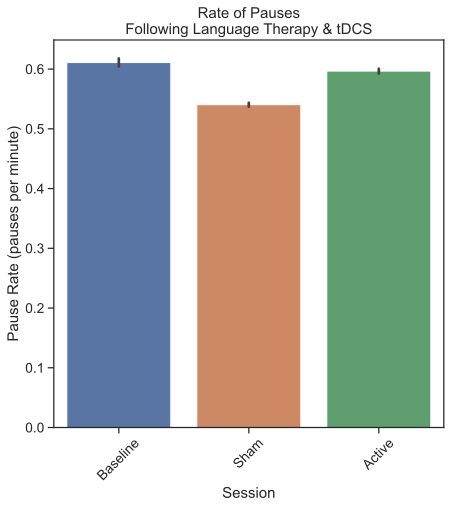

In [82]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))
order = ['Baseline', 'Sham', 'Active']
g = (
    sns
    .barplot(
        x='Session_Type',
        y='pause_rate',
        hue='Session_Type',
        hue_order = order,
        order = order,
        dodge=False,
        ax=ax,
        data=pauses)
    )
g.legend([],[], frameon=False)
plt.title('Rate of Pauses\nFollowing Language Therapy & tDCS')
plt.ylabel('Pause Rate (pauses per minute)')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()

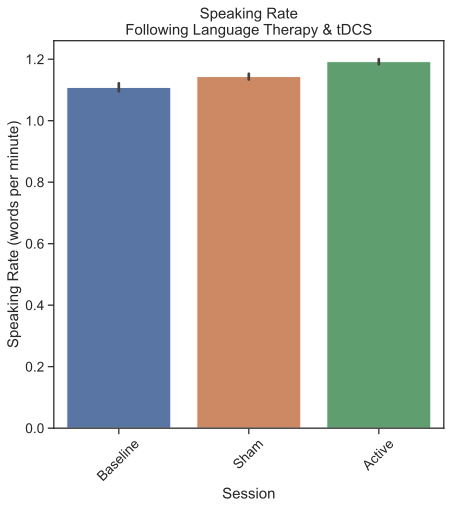

In [86]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.25)
fig, ax = plt.subplots(1, figsize=(7,7))
order = ['Baseline', 'Sham', 'Active']
g = (
    sns
    .barplot(
        x='Session_Type',
        y='spkrt',
        hue='Session_Type',
        hue_order = order,
        order = order,
        dodge=False,
        ax=ax,
        data=pauses)
    )
g.legend([],[], frameon=False)
plt.title('Speaking Rate\nFollowing Language Therapy & tDCS')
plt.ylabel('Speaking Rate (words per minute)')
plt.xlabel('Session')
plt.xticks(rotation=45)

#Show plot
plt.show()